In [2]:
import pandas as pd
import numpy as np
import os
os.chdir(r'D:\R_dataset')

In [3]:
# Load data (skip if already loaded)
df = pd.read_csv("Project_DataSet_with_PK.csv")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Feature Engineering (if not done already)
df["Total_Expenditure"] = df[[
    "Rent", "Loan_Repayment", "Insurance", "Groceries", "Transport", "Eating_Out",
    "Entertainment", "Utilities", "Healthcare", "Education", "Miscellaneous"
]].sum(axis=1)

df["Spending_Rate"] = df["Total_Expenditure"] / df["Income"]
df["Actual_Savings_Rate"] = df["Disposable_Income"] / df["Income"]
df["Overspend_Flag"] = (df["Spending_Rate"] > 0.9).astype(int)
df["Savings_Gap"] = df["Desired_Savings_Percentage"] - df["Actual_Savings_Rate"]
df["Occupation_Encoded"] = df["Occupation"].astype("category").cat.codes
df["City_Tier_Encoded"] = df["City_Tier"].astype("category").cat.codes


In [5]:
df.Occupation_Encoded.unique()

array([2, 1, 0, 3], dtype=int8)

In [6]:
print("🔢 Data Shape:", df.shape)
print("📄 Columns:\n", df.columns)
print("\n🧾 Info:")
print(df.info())
print("\n📊 Summary Statistics:")
print(df.describe().T)
print("\n❓ Missing Values:\n", df.isnull().sum())


🔢 Data Shape: (250000, 38)
📄 Columns:
 Index(['user_id', 'Income', 'Age', 'Dependents', 'Occupation', 'City_Tier',
       'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport',
       'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Total_Potential_Savings',
       'Preferred_Investment', 'investment_label', 'Total_Expenditure',
       'Spending_Rate', 'Actual_Savings_Rate', 'Overspend_Flag', 'Savings_Gap',
       'Occupation_Encoded', 'City_Tier_Encoded'],
      dtype='object')

🧾 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data colu

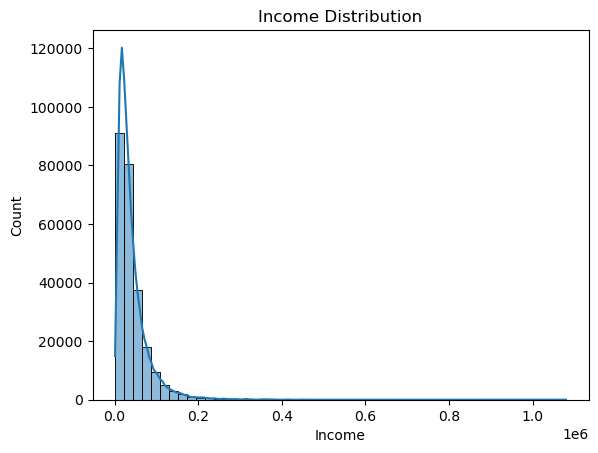

In [7]:
# Income distribution
sns.histplot(df["Income"], bins=50, kde=True)
plt.title("Income Distribution")
plt.show()

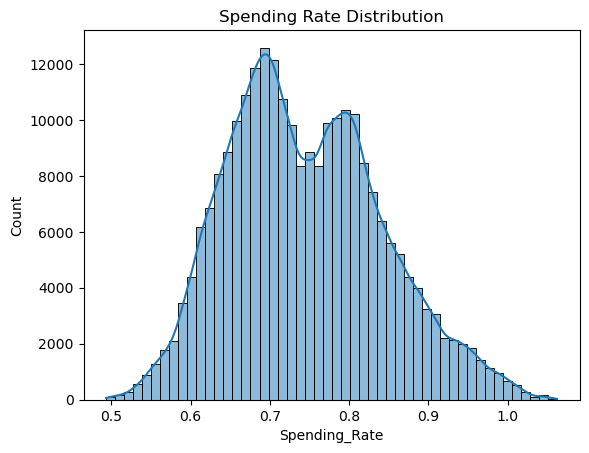

In [8]:

# Spending Rate
sns.histplot(df["Spending_Rate"], bins=50, kde=True)
plt.title("Spending Rate Distribution")
plt.show()

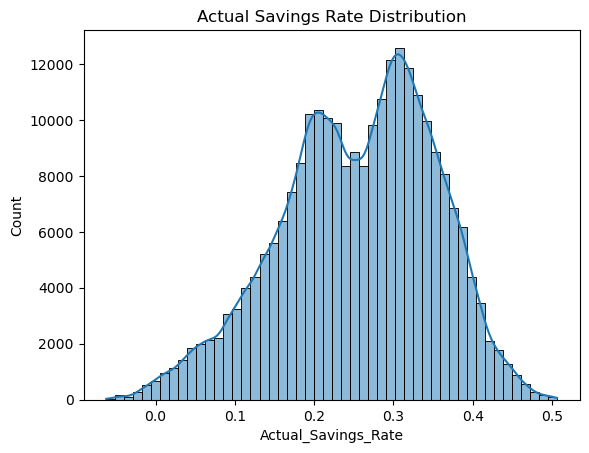

In [9]:
# Savings Rate
sns.histplot(df["Actual_Savings_Rate"], bins=50, kde=True)
plt.title("Actual Savings Rate Distribution")
plt.show()

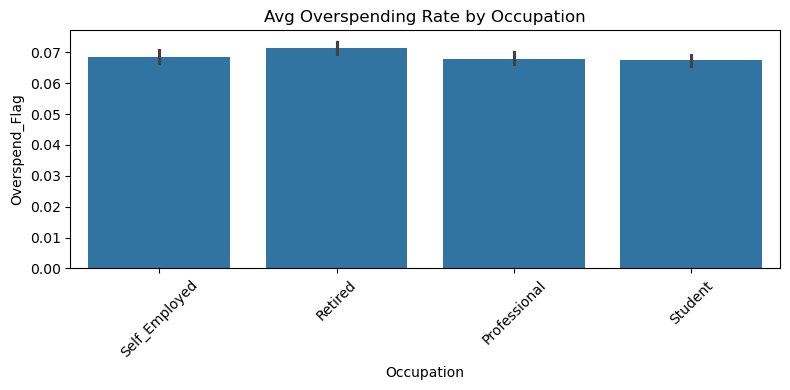

In [11]:
# Overspend Flag by Occupation
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Occupation", y="Overspend_Flag", estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title("Avg Overspending Rate by Occupation")
plt.tight_layout()
plt.show()

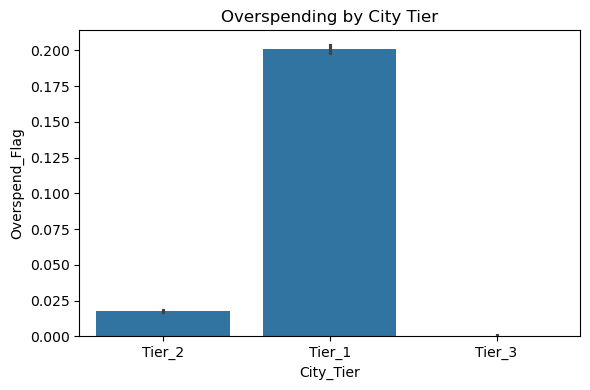

In [12]:

# Overspend Flag by City
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="City_Tier", y="Overspend_Flag", estimator=lambda x: sum(x)/len(x))
plt.title("Overspending by City Tier")
plt.tight_layout()
plt.show()

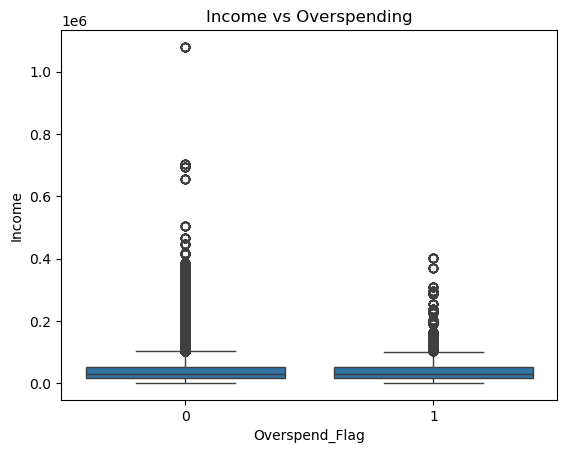

In [13]:
# Boxplot: Income vs Overspend Flag
sns.boxplot(data=df, x="Overspend_Flag", y="Income")
plt.title("Income vs Overspending")
plt.show()

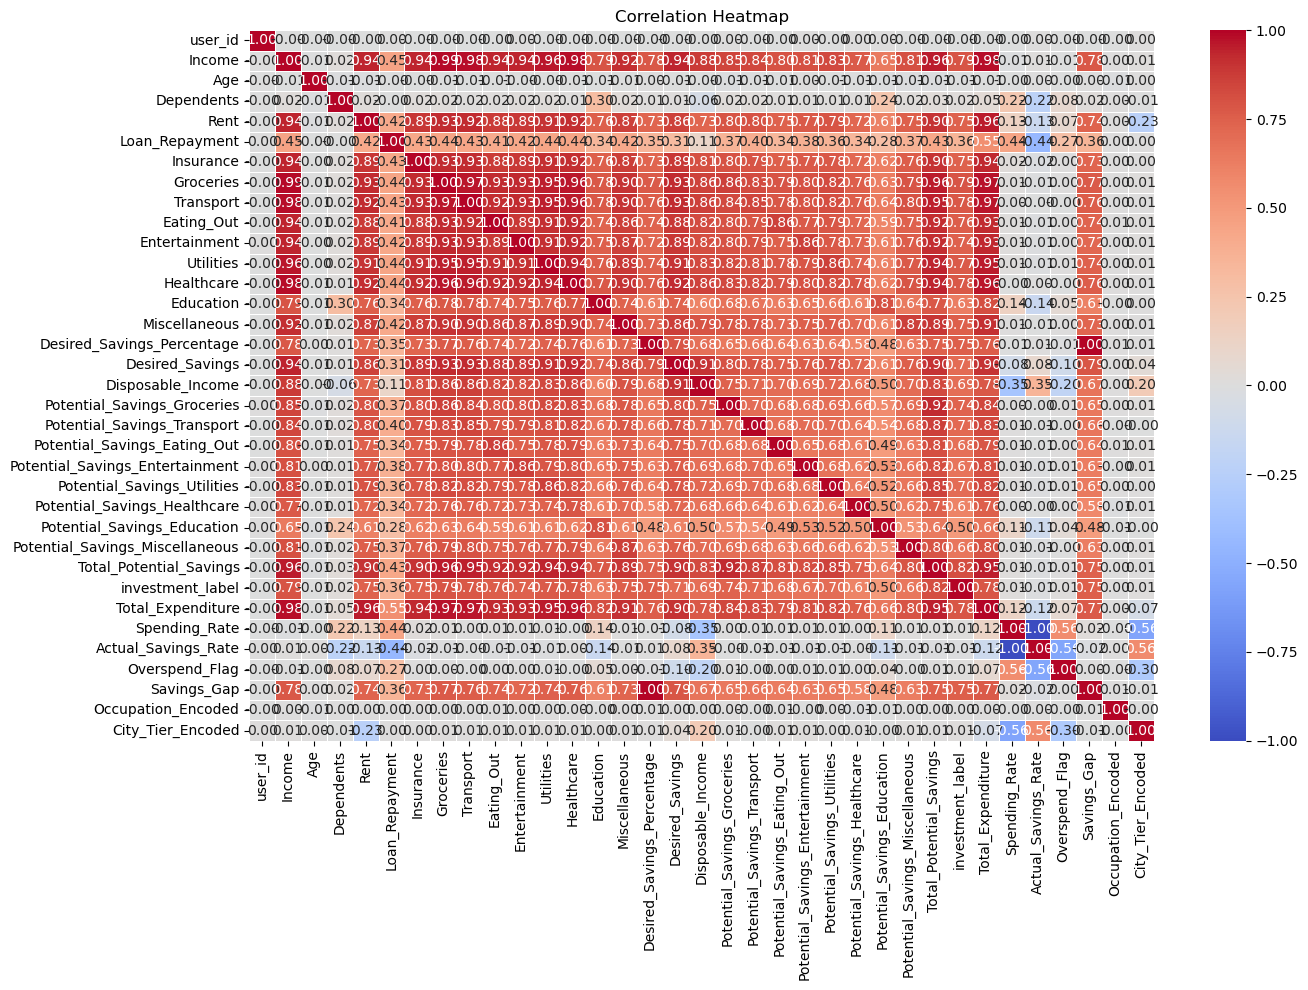

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [16]:
df["pct_groceries"] = df["Groceries"] / df["Income"]
df["pct_eating_out"] = df["Eating_Out"] / df["Income"]
df["pct_entertainment"] = df["Entertainment"] / df["Income"]
df["pct_miscellaneous"] = df["Miscellaneous"] / df["Income"]
df["pct_utilities"] = df["Utilities"] / df["Income"]

# New feature list
features = [
    "Income", "Age", "Dependents", "Desired_Savings_Percentage", "Disposable_Income",
    "Actual_Savings_Rate", "Savings_Gap", "Occupation_Encoded", "City_Tier_Encoded",
    "Total_Expenditure", "Spending_Rate",
    "pct_groceries", "pct_eating_out", "pct_entertainment", "pct_miscellaneous", "pct_utilities"
]
X = df[features]


In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ➕ Create percentage spend features
df["pct_groceries"] = df["Groceries"] / df["Income"]
df["pct_eating_out"] = df["Eating_Out"] / df["Income"]
df["pct_entertainment"] = df["Entertainment"] / df["Income"]
df["pct_miscellaneous"] = df["Miscellaneous"] / df["Income"]
df["pct_utilities"] = df["Utilities"] / df["Income"]

# 🎯 Feature list for VIF check
vif_features = [
    "Income", "Age", "Dependents","Occupation_Encoded", "City_Tier_Encoded",
    "pct_groceries", "pct_eating_out", "pct_entertainment", "pct_miscellaneous", "pct_utilities"
]


# 🧮 VIF calculation
X_vif = add_constant(df[vif_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 📋 Sort and display
print(vif_data.sort_values(by="VIF", ascending=False))


               Feature         VIF
0                const  164.587502
1               Income    1.000742
3           Dependents    1.000735
9    pct_miscellaneous    1.000712
2                  Age    1.000392
6        pct_groceries    1.000328
4   Occupation_Encoded    1.000226
8    pct_entertainment    1.000203
10       pct_utilities    1.000171
7       pct_eating_out    1.000163
5    City_Tier_Encoded    1.000143


In [18]:
selected_features = [
    "Income", "Age", "Dependents", "Occupation_Encoded", "City_Tier_Encoded",
    "pct_groceries", "pct_eating_out", "pct_entertainment", "pct_miscellaneous", "pct_utilities"
]


In [19]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score

# ✅ Define features & target
X = df[selected_features]
y = df["Overspend_Flag"]

# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define models and hyperparameters
models = {
    "LogisticRegression": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(solver='liblinear', class_weight='balanced'))
        ]),
        "params": {
            "model__C": [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
        }
    },
    "RandomForest": {
        "pipeline": Pipeline([
            ("model", RandomForestClassifier(random_state=42, class_weight='balanced'))
        ]),
        "params": {
            "model__n_estimators": [50, 100, 150],
            "model__max_depth": [5, 10, 15],
            "model__min_samples_split": [5, 10],
            "model__min_samples_leaf": [4, 6],
            "model__max_features": ["sqrt"]
        }
    },
    "LightGBM": {
        "pipeline": Pipeline([
            ("model", LGBMClassifier(random_state=42, class_weight='balanced'))
        ]),
        "params": {
            "model__n_estimators": [100, 150, 200],
            "model__max_depth": [5, 10, -1],
            "model__learning_rate": [0.05, 0.1]
        }
    }
}

# 🧪 Train and Evaluate all models
best_f1 = 0
best_model = None

for name, cfg in models.items():
    print(f"\n🔍 Training {name}...")
    grid = GridSearchCV(cfg["pipeline"], cfg["params"], cv=3, scoring="f1", verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"✅ {name} F1 Score: {f1:.4f} | Recall: {recall:.4f}")
    print("📋 Best Params:", grid.best_params_)
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("🧾 Classification Report:\n", classification_report(y_test, y_pred))

    if f1 > best_f1:
        best_f1 = f1
        best_model = (name, grid.best_estimator_)

# ✅ Final selected model
print(f"\n🏆 Best Model: {best_model[0]} with F1 Score: {best_f1:.4f}")



🔍 Training LogisticRegression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ LogisticRegression F1 Score: 0.3347 | Recall: 0.8538
📋 Best Params: {'model__C': 0.2}
📊 Confusion Matrix:
 [[35305 11235]
 [  506  2954]]
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     46540
           1       0.21      0.85      0.33      3460

    accuracy                           0.77     50000
   macro avg       0.60      0.81      0.60     50000
weighted avg       0.93      0.77      0.82     50000


🔍 Training RandomForest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ RandomForest F1 Score: 0.5821 | Recall: 1.0000
📋 Best Params: {'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'model__n_estimators': 50}
📊 Confusion Matrix:
 [[41571  4969]
 [    0  3460]]
🧾 Classification Report:
               precision    recall  f1

In [20]:
import joblib

# Save the best model (you already selected LightGBM as best)
joblib.dump(best_model[1], "lightgbm_overspending_model.pkl")

print("✅ Model saved as 'lightgbm_overspending_model.pkl'")


✅ Model saved as 'lightgbm_overspending_model.pkl'


In [ ]:
2nd

In [21]:
# ➕ More % Features
df["pct_rent"] = df["Rent"] / df["Income"]
df["pct_insurance"] = df["Insurance"] / df["Income"]
df["pct_transport"] = df["Transport"] / df["Income"]
df["pct_education"] = df["Education"] / df["Income"]

# ➕ Logical flags
df["Has_Loan"] = (df["Loan_Repayment"] > 0).astype(int)
df["High_Insurance"] = (df["Insurance"] > df["Income"] * 0.1).astype(int)

# 🎯 Feature list for VIF check
vif_features_savings = [
    "Income", "Age", "Dependents", "Occupation_Encoded",
    "Desired_Savings_Percentage", "pct_rent", "pct_insurance", "pct_transport", "pct_education",
    "Has_Loan"
]

# 🧮 VIF calculation
X_vif_savings = add_constant(df[vif_features_savings])
vif_data_savings = pd.DataFrame()
vif_data_savings["Feature"] = X_vif_savings.columns
vif_data_savings["VIF"] = [variance_inflation_factor(X_vif_savings.values, i) for i in range(X_vif_savings.shape[1])]

# 📋 Sort and display
print("📊 VIF for Savings Features:")
print(vif_data_savings.sort_values(by="VIF", ascending=False))

📊 VIF for Savings Features:
                       Feature         VIF
0                        const  112.990763
1                       Income    2.511025
5   Desired_Savings_Percentage    2.510732
3                   Dependents    1.731712
9                pct_education    1.731225
2                          Age    1.000521
7                pct_insurance    1.000409
8                pct_transport    1.000314
4           Occupation_Encoded    1.000239
6                     pct_rent    1.000217
10                    Has_Loan    1.000167


In [22]:
from sklearn.model_selection import train_test_split

# 🎯 Features and Target
savings_features = [
    "Income", "Age", "Dependents", "Occupation_Encoded",
    "Desired_Savings_Percentage", "pct_rent", "pct_insurance", "pct_transport", "pct_education",
    "Has_Loan"
]

X = df[savings_features]
y = df["Actual_Savings_Rate"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pipeline_rf = Pipeline([
    ("model", RandomForestRegressor(
        n_estimators=50,         # More trees
        max_depth=12,             # Slightly deeper trees
        min_samples_split=5,      # Split only when ≥5 samples
        min_samples_leaf=3,       # Each leaf must have ≥3 samples
        max_features='sqrt',      # Consider √features at each split
        random_state=42,
        n_jobs=-1
    ))
])

pipeline_rf.fit(X_train, y_train)
y_pred = pipeline_rf.predict(X_test)

print("📌 RandomForest (Tuned) →",
      "RMSE:", mean_squared_error(y_test, y_pred, squared=False),
      "| MAE:", mean_absolute_error(y_test, y_pred),
      "| R²:", r2_score(y_test, y_pred))


📌 RandomForest (Tuned) → RMSE: 0.0283375154745022 | MAE: 0.021832599641214315 | R²: 0.9155319127544749


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline_gb = Pipeline([
    ("model", GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42))
])

pipeline_gb.fit(X_train, y_train)
y_pred = pipeline_gb.predict(X_test)

print("📌 GradientBoosting →",
      "RMSE:", mean_squared_error(y_test, y_pred, squared=False),
      "| MAE:", mean_absolute_error(y_test, y_pred),
      "| R²:", r2_score(y_test, y_pred))


📌 GradientBoosting → RMSE: 0.035777669195549366 | MAE: 0.02768283432590949 | R²: 0.8653540770315593


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔧 LightGBM pipeline (no scaling needed, but keeping for comparison)
pipeline_lgbm = Pipeline([
    ("model", LGBMRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

pipeline_lgbm.fit(X_train, y_train)
y_pred = pipeline_lgbm.predict(X_test)

print("📌 LightGBM →",
      "RMSE:", mean_squared_error(y_test, y_pred, squared=False),
      "| MAE:", mean_absolute_error(y_test, y_pred),
      "| R²:", r2_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 10
[LightGBM] [Info] Start training from score 0.255069
📌 LightGBM → RMSE: 0.03142586030181978 | MAE: 0.02451232511617659 | R²: 0.8961172422005954


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
import joblib
joblib.dump(pipeline_rf, "savings_rate_model_rf_optimized.pkl")
print("✅ RandomForest model saved as 'savings_rate_model_rf_optimized.pkl'")

✅ RandomForest model saved as 'savings_rate_model_rf_optimized.pkl'


In [27]:
import joblib

# Load models
savings_model = joblib.load("savings_rate_model_rf_optimized.pkl")
overspend_model = joblib.load("lightgbm_overspending_model.pkl")

# Extract feature names
print("📊 Savings Model Feature Order:")
print(list(savings_model.feature_names_in_))  # Should work

print("\n📉 Overspending Model Feature Order:")
# Find last step in pipeline and get feature names
for name, step in overspend_model.steps:
    if hasattr(step, "feature_names_in_"):
        print(f"Step: {name}")
        print(list(step.feature_names_in_))


📊 Savings Model Feature Order:
['Income', 'Age', 'Dependents', 'Occupation_Encoded', 'Desired_Savings_Percentage', 'pct_rent', 'pct_insurance', 'pct_transport', 'pct_education', 'Has_Loan']

📉 Overspending Model Feature Order:
Step: model
['Income', 'Age', 'Dependents', 'Occupation_Encoded', 'City_Tier_Encoded', 'pct_groceries', 'pct_eating_out', 'pct_entertainment', 'pct_miscellaneous', 'pct_utilities']


In [ ]:
3rd investment

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import joblib

# 📥 Load and encode data
df = pd.read_csv("Project_DataSet_with_PK.csv")
df["Occupation_encoded"] = LabelEncoder().fit_transform(df["Occupation"])
df["City_Tier_encoded"] = LabelEncoder().fit_transform(df["City_Tier"])

# 🎯 Cleaned feature set (no derived features)
selected_features = [
    "Income", "Age", "Dependents", "Occupation_encoded", "City_Tier_encoded",
    "Desired_Savings_Percentage"
]
X = df[selected_features]
y = df["investment_label"]

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🔍 Hyperparameter grid
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [5, 10],
    'clf__max_features': ['sqrt', 'log2']
}

# 📦 Pipeline (no SMOTE, just scaling + classifier)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(random_state=42))
])

# 📊 Grid search with Stratified K-Fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# ✅ Evaluate
y_pred = grid.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, grid.predict(X_train))

print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"📚 Train Accuracy: {train_acc:.4f}")
print("Best Params:", grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 💾 Save model if not overfitting
if abs(train_acc - test_acc) < 0.1:
    joblib.dump(grid.best_estimator_, "decision_tree_final_model.pkl")
    print("📦 Model saved as decision_tree_final_model.pkl ✅")
else:
    print("⚠️ Model not saved due to potential overfitting (train-test gap too high)")


Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Test Accuracy: 0.8831
📚 Train Accuracy: 0.8822
Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 7, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     27048
           1       0.83      0.84      0.84     17330
           2       0.83      0.81      0.82      5331
           3       0.74      0.79      0.76       291

    accuracy                           0.88     50000
   macro avg       0.83      0.84      0.84     50000
weighted avg       0.88      0.88      0.88     50000

📦 Model saved as decision_tree_final_model.pkl ✅


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import joblib

# 📥 Load dataset
df = pd.read_csv("Project_DataSet_with_PK.csv")
df["Occupation_encoded"] = LabelEncoder().fit_transform(df["Occupation"])
df["City_Tier_encoded"] = LabelEncoder().fit_transform(df["City_Tier"])

# ✅ Feature set (leakage-free)
selected_features = [
    "Income", "Age", "Dependents", "Occupation_encoded", "City_Tier_encoded",
    "Desired_Savings_Percentage"
]
X = df[selected_features]
y = df["investment_label"]

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🧠 XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 🔍 Hyperparameter grid
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6],
    'clf__learning_rate': [0.05, 0.1],
    'clf__subsample': [0.8, 1.0]
}

# 🧱 Pipeline (standardization + XGBoost)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", xgb)
])

# 🧪 Grid search with StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# 📊 Evaluation
y_pred = grid.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, grid.predict(X_train))

print(f"\n✅ XGBoost Test Accuracy: {test_acc:.4f}")
print(f"📚 XGBoost Train Accuracy: {train_acc:.4f}")
print("Best Params:", grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 💾 Save model if not overfitting
if abs(train_acc - test_acc) < 0.1:
    joblib.dump(grid.best_estimator_, "xgboost_investment_model.pkl")
    print("📦 Model saved as xgboost_investment_model.pkl ✅")
else:
    print("⚠️ Model not saved due to potential overfitting")


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [18:30:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Test Accuracy: 0.9307
📚 XGBoost Train Accuracy: 0.9343
Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'clf__subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     27048
           1       0.89      0.91      0.90     17330
           2       0.92      0.89      0.91      5331
           3       1.00      1.00      1.00       291

    accuracy                           0.93     50000
   macro avg       0.94      0.94      0.94     50000
weighted avg       0.93      0.93      0.93     50000

📦 Model saved as xgboost_investment_model.pkl ✅


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

# 📥 Load data
df = pd.read_csv("Project_DataSet_with_PK.csv")
df["Occupation_encoded"] = LabelEncoder().fit_transform(df["Occupation"])
df["City_Tier_encoded"] = LabelEncoder().fit_transform(df["City_Tier"])

# 🎯 Feature selection (leakage-free)
features = [
    "Income", "Age", "Dependents", "Occupation_encoded", "City_Tier_encoded",
    "Desired_Savings_Percentage"
]
X = df[features]
y = df["investment_label"]

# 🔀 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ✅ Models + Param Grids
models = {
    "LightGBM": (
        LGBMClassifier(random_state=42),
        {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [5, 10],
            'clf__learning_rate': [0.05, 0.1]
        }
    ),
    "CatBoost": (
        CatBoostClassifier(verbose=0, random_state=42),
        {
            'clf__iterations': [100, 200],
            'clf__depth': [4, 6],
            'clf__learning_rate': [0.05, 0.1]
        }
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, multi_class='multinomial'),
        {
            'clf__C': [0.1, 1.0, 10],
            'clf__solver': ['lbfgs']
        }
    )
}

# 🧠 Run each model
for name, (model, param_grid) in models.items():
    print(f"\n🔍 Tuning {name}...")
    
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    # Evaluation
    y_pred = grid.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, grid.predict(X_train))

    print(f"\n✅ {name} Test Accuracy: {test_acc:.4f}")
    print(f"📚 {name} Train Accuracy: {train_acc:.4f}")
    print("Best Params:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))


🔍 Tuning LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 6
[LightGBM] [Info] Start training from score -0.614410
[LightGBM] [Info] Start training from score -1.059555
[LightGBM] [Info] Start training from score -2.238484
[LightGBM] [Info] Start training from score -5.148175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
import joblib

# Load dataset
df = pd.read_csv("Project_DataSet_with_PK.csv")
df["Occupation_encoded"] = pd.factorize(df["Occupation"])[0]
df["City_Tier_encoded"] = pd.factorize(df["City_Tier"])[0]

# Feature engineering
df["pct_groceries"] = df["Groceries"] / df["Income"]
df["pct_eating_out"] = df["Eating_Out"] / df["Income"]
df["pct_entertainment"] = df["Entertainment"] / df["Income"]
df["pct_miscellaneous"] = df["Miscellaneous"] / df["Income"]
df["pct_utilities"] = df["Utilities"] / df["Income"]
df["pct_transport"] = df["Transport"] / df["Income"]
df["pct_education"] = df["Education"] / df["Income"]
df["pct_insurance"] = df["Insurance"] / df["Income"]

df["Actual_Savings"] = df["Income"] - (
    df["Rent"] + df["Loan_Repayment"] + df["Groceries"] + df["Transport"] +
    df["Eating_Out"] + df["Entertainment"] + df["Utilities"] + df["Insurance"] +
    df["Healthcare"] + df["Education"] + df["Miscellaneous"]
)
df["Actual_Savings_Pct"] = df["Actual_Savings"] / df["Income"]
df["Savings_Gap"] = df["Desired_Savings_Percentage"] - df["Actual_Savings_Pct"]

# Selected smart features
features = [
    "Income", "Age", "Dependents", "Occupation_encoded", "City_Tier_encoded",
    "Desired_Savings_Percentage", "pct_eating_out", "pct_entertainment",
    "pct_miscellaneous", "pct_insurance", "pct_transport",
    "Actual_Savings_Pct", "Savings_Gap"
]
X = df[features]
y = df["investment_label"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Build pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LGBMClassifier(random_state=42))
])

# Grid Search
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10],
    'clf__learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid.fit(X_train, y_train)

# Evaluate
y_pred = grid.predict(X_test)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("📚 Train Accuracy:", accuracy_score(y_train, grid.predict(X_train)))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🏆 Best Params:", grid.best_params_)

# Save model
joblib.dump(grid.best_estimator_, "lightgbm_behavioral_model.pkl")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2358
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 13
[LightGBM] [Info] Start training from score -0.614410
[LightGBM] [Info] Start training from score -1.059555
[LightGBM] [Info] Start training from score -2.238484
[LightGBM] [Info] Start training from score -5.148175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

['lightgbm_behavioral_model.pkl']